In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load

In [41]:
ins_dataset = pd.read_csv("insurance.csv")
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
ins_dataset.shape

(1199, 7)

In [43]:
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1199 non-null   int64  
 1   sex       1199 non-null   object 
 2   bmi       1199 non-null   float64
 3   children  1199 non-null   int64  
 4   smoker    1199 non-null   object 
 5   region    1199 non-null   object 
 6   charges   1199 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.7+ KB


**Categorical Features**
* Sex
* Smoker
* Region

In [44]:
#Analyse if any values are missing
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DATA ANALYSIS

In [45]:
ins_dataset.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,39.447873,30.773749,1.085905,13256.338172
std,14.061470,6.073479,1.201054,11996.944740
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.410000,0.000000,4757.982900
50%,40.000000,30.500000,1.000000,9432.925300
75%,51.000000,34.800000,2.000000,16622.107580
max,64.000000,52.580000,5.000000,63770.428010


C:\Users\Viraj Prabhakar More\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


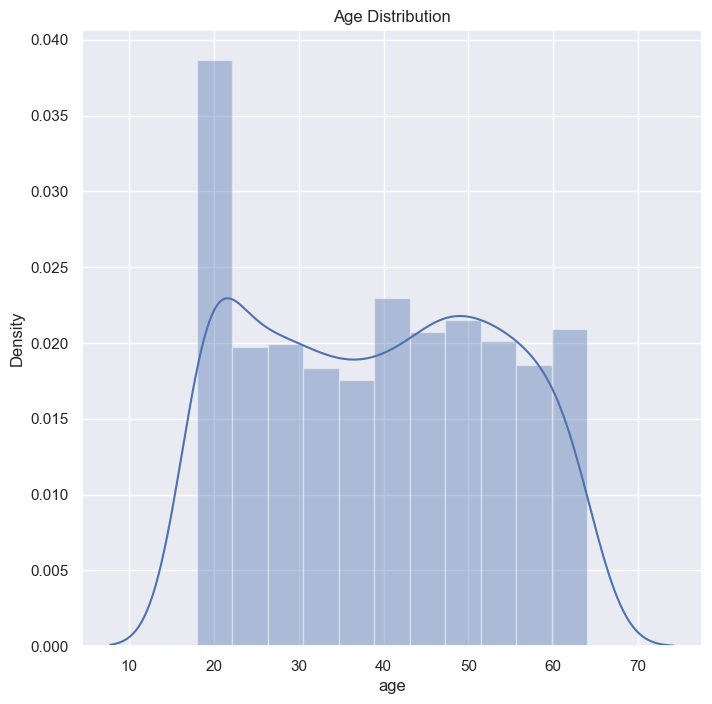

In [46]:
sns.set()
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.distplot(ins_dataset["age"])
plt.show()

C:\Users\Viraj Prabhakar More\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


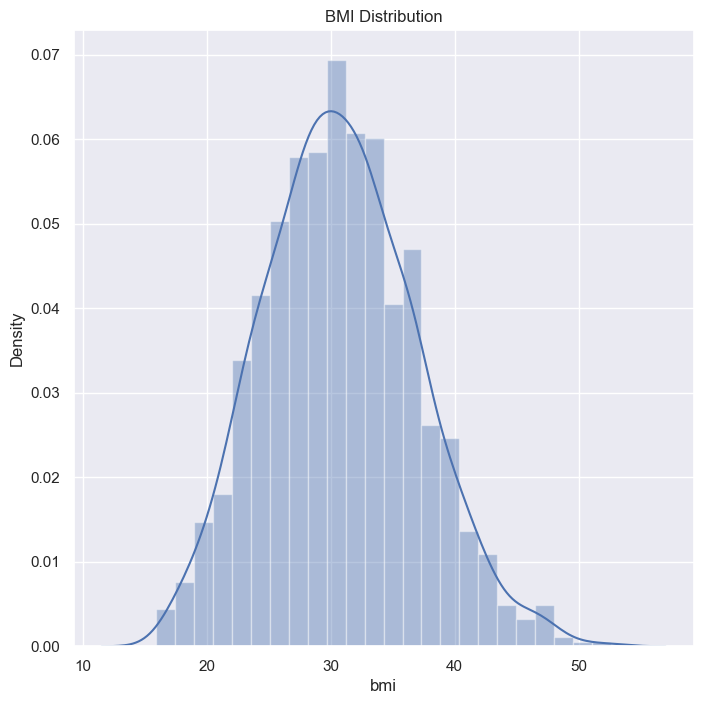

In [47]:
sns.set()
plt.figure(figsize=(8,8))
plt.title("BMI Distribution")
sns.distplot(ins_dataset["bmi"])
plt.show()

Normal BMI Range is between 18.5 & 24.9

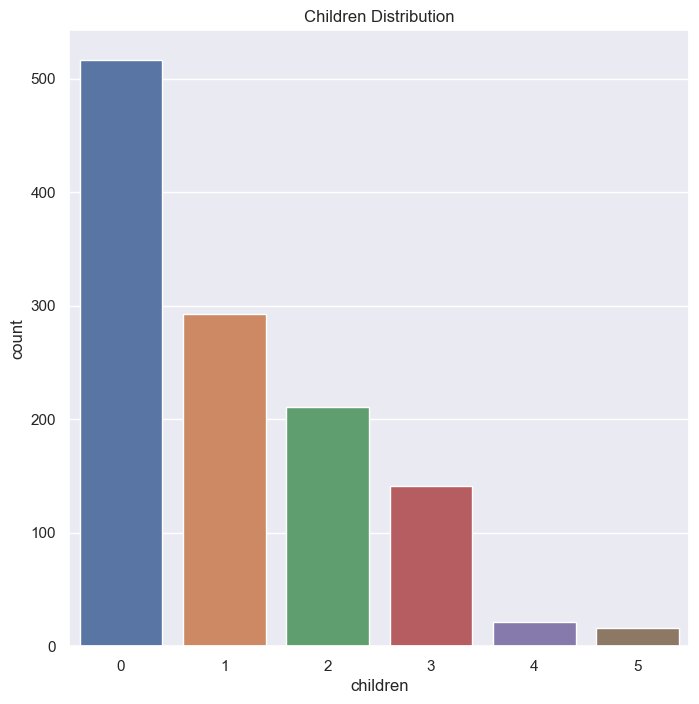

In [48]:
# We plot its countplot as there are only 6 distinct values
plt.figure(figsize=(8,8))
sns.countplot(x="children", data=ins_dataset)
plt.title("Children Distribution")
plt.show()

In [49]:
ins_dataset["children"].value_counts()

0    517
1    293
2    211
3    141
4     21
5     16
Name: children, dtype: int64

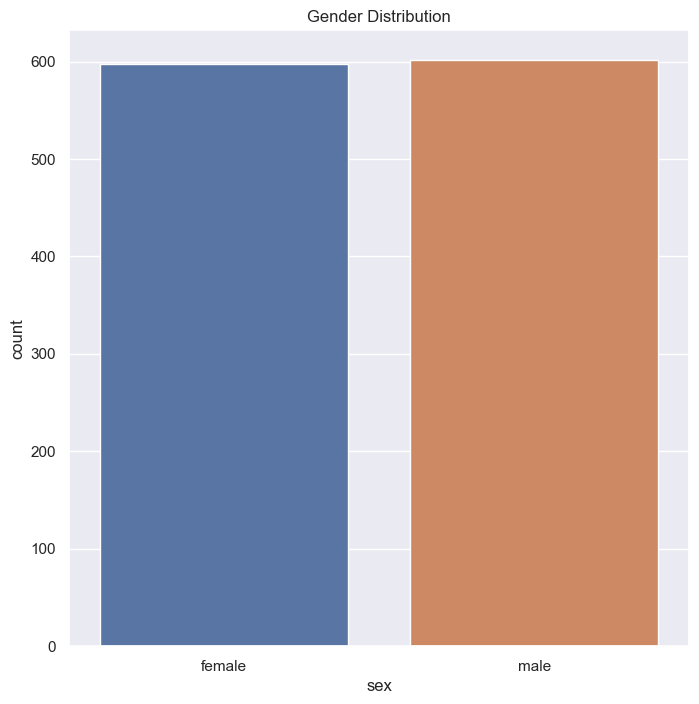

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(x="sex", data=ins_dataset)
plt.title("Gender Distribution")
plt.show()

In [51]:
ins_dataset["sex"].value_counts()

male      602
female    597
Name: sex, dtype: int64

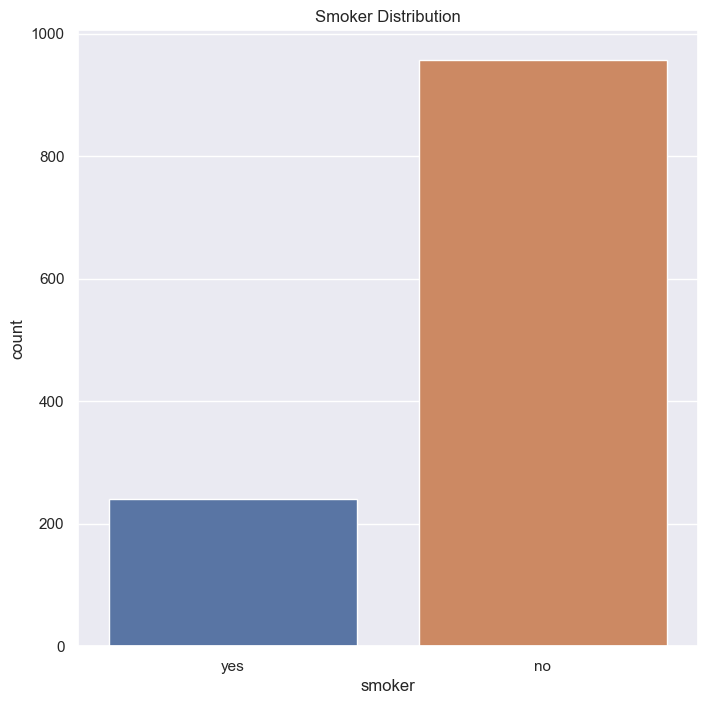


 no     958
yes    241
Name: smoker, dtype: int64


In [52]:
plt.figure(figsize=(8,8))
sns.countplot(x="smoker", data=ins_dataset)
plt.title("Smoker Distribution")
plt.show()
print("\n",ins_dataset["smoker"].value_counts())

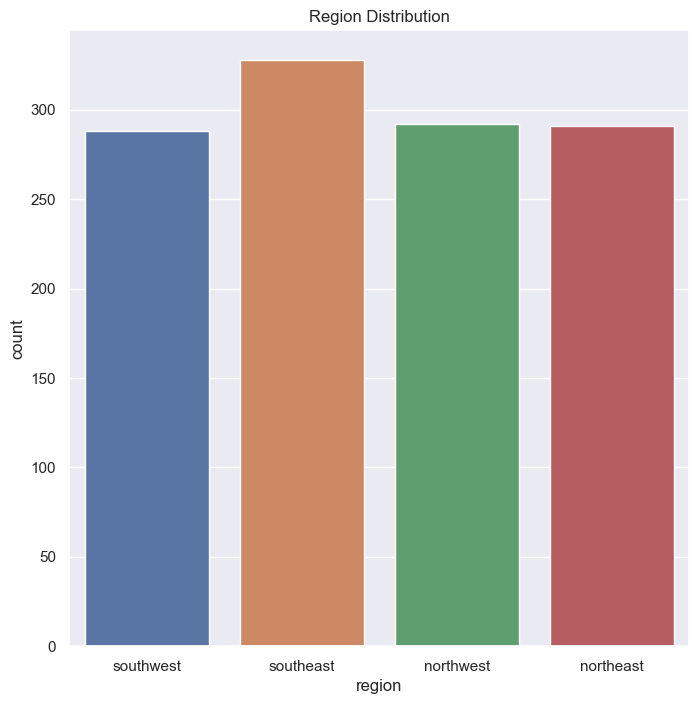


 southeast    328
northwest    292
northeast    291
southwest    288
Name: region, dtype: int64


In [53]:
plt.figure(figsize=(8,8))
sns.countplot(x="region", data=ins_dataset)
plt.title("Region Distribution")
plt.show()
print("\n",ins_dataset["region"].value_counts())

C:\Users\Viraj Prabhakar More\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


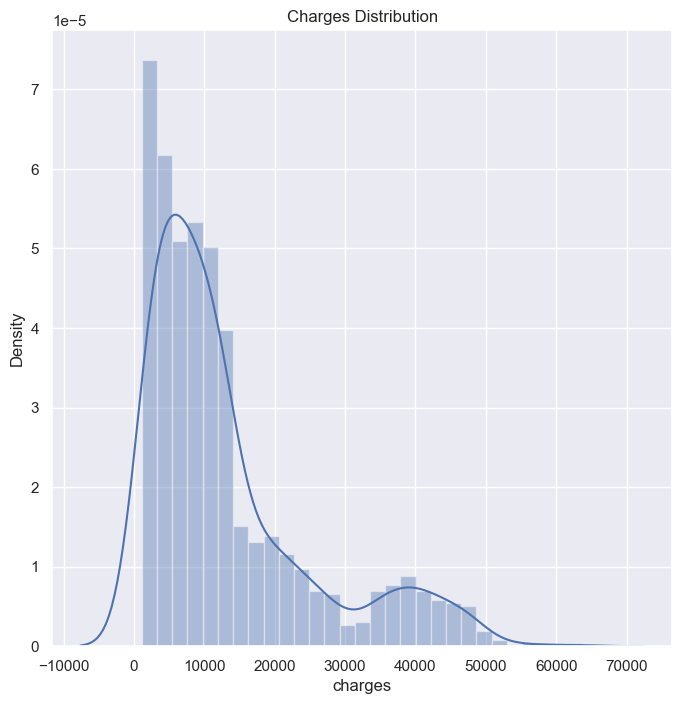

In [54]:
sns.set()
plt.figure(figsize=(8,8))
plt.title("Charges Distribution")
sns.distplot(ins_dataset["charges"])
plt.show()

#  ENCODING THE CATEGORICAL FEATURES

In [55]:
#encoding smoker column
ins_dataset.replace({'smoker':{'yes': 1, 'no': 0}}, inplace=True)

#encoding sex column
ins_dataset.replace({"sex":{"male":0, "female":1}}, inplace=True)

#encoding region column
ins_dataset.replace({"region":{"southeast":0, "southwest":1,"northeast":2,"northwest":3}}, inplace=True)

In [56]:
#Transformed Data
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# SPLITTING THE TARGET & FEATURES

In [57]:
X = ins_dataset.drop(columns="charges", axis=1)
Y = ins_dataset["charges"]

In [58]:
#Features
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1194,31,1,21.755,0,0,3
1195,19,1,27.930,3,0,3
1196,19,1,30.020,0,1,3
1197,41,0,33.550,0,0,0


In [59]:
#TARGET
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1194     4134.08245
1195    18838.70366
1196    33307.55080
1197     5699.83750
1198     6393.60345
Name: charges, Length: 1199, dtype: float64

#SPLITTING TRAINING & TEST DATA

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1199, 6) (959, 6) (240, 6)


# IMPLEMENTATION OF MODEL

**Linear Regression**

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, Y_train)

LinearRegression()

**Evaluation of Model**

In [64]:
#Prediction on training data
train_data_predict = model.predict(X_train)

In [65]:
#Compare orignal Y to predicted Y
rsq_train = metrics.r2_score(Y_train, train_data_predict)

In [66]:
print("R squared value = ",rsq_train)

R squared value =  0.7394004218938925


In [67]:
#Prediction on test data
test_data_predict = model.predict(X_test)

In [68]:
rsq_test = metrics.r2_score(Y_test, test_data_predict)

In [69]:
rsq_test

0.7841831619401243

**SAVING THE MODEL**

In [70]:
dump(model,"InsurancePredictor.joblib" )

['InsurancePredictor.joblib']

**TESTING THE MODEL**

In [71]:
predictor = load("InsurancePredictor.joblib")

In [72]:
predictor.predict([[59,0,37.1,1,0,1]])

array([15133.87946849])